<a href="https://colab.research.google.com/github/wisabd/MLOps-Hands-on/blob/main/MLFlow_Experiments_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install imblearn
!pip install matplotlib
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 9.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np




def load_data(path):
    data = pd.read_csv(path)
    return data


data = load_data('https://raw.githubusercontent.com/wisabd/MLOps-Hands-on/main/banking.csv')
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:

def data_cleaning(data):
    print("na values available in data \n")
    print(data.isna().sum())
    data = data.dropna()
    print("after droping na values \n")
    print(data.isna().sum())
    return data


In [6]:
def preprocessing(data):
    data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
    data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
    data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

    cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(data[var], prefix=var)
        data1=data.join(cat_list)
        data=data1

    cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
    data_vars=data.columns.values.tolist()
    to_keep=[i for i in data_vars if i not in cat_vars]

    final_data=data[to_keep]


    final_data.columns = final_data.columns.str.replace('.','_')
    final_data.columns = final_data.columns.str.replace(' ','_')
    return final_data

In [7]:
def train_test_split(final_data):
    from sklearn.model_selection import train_test_split
    X = final_data.loc[:, final_data.columns != 'y']
    y = final_data.loc[:, final_data.columns == 'y']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=47)
    return X_train, X_test, y_train, y_test


In [8]:
def over_sampling_target_class(X_train, y_train):
    ### Over-sampling using SMOTE
    from imblearn.over_sampling import SMOTE
    os = SMOTE(random_state=0)

    columns = X_train.columns
    os_data_X,os_data_y=os.fit_resample(X_train, y_train)

    os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
    os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
    # we can Check the numbers of our data
    print("length of oversampled data is ",len(os_data_X))
    print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
    print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
    print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
    print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

    X_train = os_data_X
    y_train = os_data_y['y']

    return X_train, y_train

In [9]:
def training_basic_classifier(X_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=101)
    model.fit(X_train, y_train)

    return model


In [10]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [11]:
def predict_prob_on_test_data(model,X_test):
    y_pred = model.predict_proba(X_test)
    return y_pred

In [12]:
def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}




In [13]:

def create_roc_auc_plot(clf, X_data, y_data):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    from sklearn.metrics import RocCurveDisplay
    import matplotlib.pyplot as plt

    # Assuming you have a fitted model (e.g., `clf`) and test data (X_test, y_test)
    RocCurveDisplay.from_estimator(clf, X_data, y_data)
   # metrics.plot_roc_curve(clf, X_data, y_data)
    plt.savefig('roc_auc_curve.png')


In [14]:
def create_confusion_matrix_plot(clf, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import ConfusionMatrixDisplay
    from sklearn.metrics import confusion_matrix
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.savefig('confusion_matrix.png')

In [15]:
def hyper_parameter_tuning(X_train, y_train):
    # define random parameters grid
    n_estimators = [5,21,51,101] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
    min_samples_split = [2, 6, 10] # minimum sample number to split a node
    min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
    bootstrap = [True, False] # method used to sample data points

    random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap
                  }

    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier()
    model_tuning = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
                   n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
    model_tuning.fit(X_train, y_train)

    print ('Random grid: ', random_grid, '\n')
    # print the best parameters
    print ('Best Parameters: ', model_tuning.best_params_, ' \n')

    best_params = model_tuning.best_params_

    n_estimators = best_params['n_estimators']
    min_samples_split = best_params['min_samples_split']
    min_samples_leaf = best_params['min_samples_leaf']
    max_features = best_params['max_features']
    max_depth = best_params['max_depth']
    bootstrap = best_params['bootstrap']

    model_tuned = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split,
                                         min_samples_leaf= min_samples_leaf, max_features = max_features,
                                         max_depth= max_depth, bootstrap=bootstrap)
    model_tuned.fit( X_train, y_train)
    return model_tuned,best_params

In [16]:
data = load_data('https://raw.githubusercontent.com/wisabd/MLOps-Hands-on/main/banking.csv')

In [17]:
cleaned_data = data_cleaning(data)

na values available in data 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64
after droping na values 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [18]:
final_data = preprocessing(cleaned_data)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(final_data)

In [20]:
X_train, y_train = over_sampling_target_class(X_train, y_train)

length of oversampled data is  51166
Number of no subscription in oversampled data 25583
Number of subscription 25583
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [21]:
model = training_basic_classifier(X_train,y_train)

In [22]:
y_pred = predict_on_test_data(model,X_test)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [24]:

y_pred_prob = predict_prob_on_test_data(model,X_test) #model.predict_proba(X_test)

In [25]:
y_pred_prob

array([[0.97029703, 0.02970297],
       [1.        , 0.        ],
       [0.91089109, 0.08910891],
       ...,
       [1.        , 0.        ],
       [0.76237624, 0.23762376],
       [1.        , 0.        ]])

In [26]:
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)


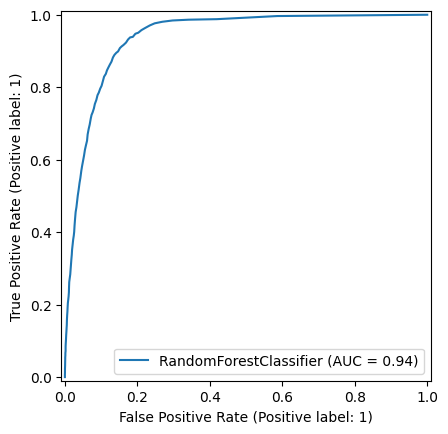

In [27]:
create_roc_auc_plot(model, X_test, y_test)

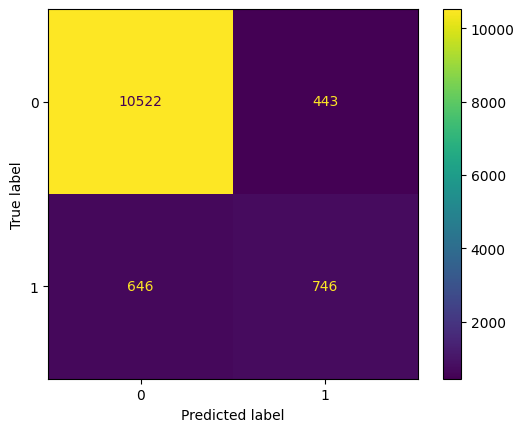

In [28]:
create_confusion_matrix_plot(model, X_test, y_test)

In [29]:
!pip install pyngrok -q
from pyngrok import ngrok

# Paste your token here (replace 'YOUR_TOKEN')
!ngrok authtoken 2wowibXHo0l84Vn17hEzSd2XxoY_KvzuGym84U5hJRMAfM3v  # Example: '2AbCdeFGHijKLmNopQRstUVwXyz123456'

# Start MLflow server
!mlflow server --host 0.0.0.0 --port 5000 --backend-store-uri /content/mlruns &>/dev/null&

# Create public URL
public_url = ngrok.connect(5000)
print("🌐 MLflow URL:", public_url)

experiment_name = "basic_classifier" ##basic classifier
run_name="term_deposit"
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)
print(run_metrics)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🌐 MLflow URL: NgrokTunnel: "https://c04a-34-19-72-139.ngrok-free.app" -> "http://localhost:5000"
{'accuracy': 0.91, 'precision': 0.63, 'recall': 0.54, 'entropy': 0.2}


In [33]:
!lsof -i :5000  # Check if port 5000 is occupied
!ps aux | grep mlflow  # Check if mlflow process is running

COMMAND    PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
gunicorn: 3603 root    5u  IPv4 100257      0t0  TCP *:5000 (LISTEN)
gunicorn: 3604 root    5u  IPv4 100257      0t0  TCP *:5000 (LISTEN)
gunicorn: 3605 root    5u  IPv4 100257      0t0  TCP *:5000 (LISTEN)
gunicorn: 3606 root    5u  IPv4 100257      0t0  TCP *:5000 (LISTEN)
gunicorn: 3607 root    5u  IPv4 100257      0t0  TCP *:5000 (LISTEN)
root        3541  1.0  1.6 586812 216852 ?       Sl   16:27   0:04 /usr/bin/python3 /usr/local/bin/mlflow server --host 0.0.0.0 --port 5000 --backend-store-uri /content/mlruns
root        3603  0.0  0.1  33156 23696 ?        S    16:28   0:00 gunicorn: master [mlflow.server:app]
root        3604  0.8  1.5 582348 211508 ?       Sl   16:28   0:03 gunicorn: worker [mlflow.server:app]
root        3605  0.8  1.5 582348 211512 ?       Sl   16:28   0:03 gunicorn: worker [mlflow.server:app]
root        3606  0.8  1.5 582344 211516 ?       Sl   16:28   0:03 gunicorn: worker [mlflow.server:app]
root 

In [32]:
create_experiment(experiment_name,run_name,run_metrics,model,'confusion_matrix.png', 'roc_auc_curve.png')

2025/05/08 16:30:59 INFO mlflow.tracking.fluent: Experiment with name 'basic_classifier' does not exist. Creating a new experiment.
2025/05/08 16:31:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run - term_deposit is logged to Experiment - basic_classifier


In [31]:
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None,
                      roc_auc_plot_path = None, run_params=None):
    import mlflow
    #mlflow.set_tracking_uri("http://localhost:5000") #uncomment this line if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(experiment_name)

    with mlflow.start_run():

        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])

        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
5
        mlflow.sklearn.log_model(model, "model")

        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')

        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")

        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})

    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))


In [34]:
import mlflow
experiment_name = "optimized model"
run_name="Random_Search_CV_tuned_model"
model_tuned,best_params = hyper_parameter_tuning(X_train, y_train)
run_params = best_params

y_pred = predict_on_test_data(model_tuned,X_test)
y_pred_prob = predict_prob_on_test_data(model_tuned,X_test)
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
235 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
235 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Random grid:  {'n_estimators': [5, 21, 51, 101], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 101, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}  



In [35]:
for params in run_params:
    print(params, run_params[params])

n_estimators 101
min_samples_split 10
min_samples_leaf 1
max_features sqrt
max_depth 70
bootstrap True


In [36]:
create_experiment(experiment_name,run_name,run_metrics,model_tuned,'confusion_matrix.png', 'roc_auc_curve.png',run_params)

2025/05/08 17:43:39 INFO mlflow.tracking.fluent: Experiment with name 'optimized model' does not exist. Creating a new experiment.
2025/05/08 17:43:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run - Random_Search_CV_tuned_model is logged to Experiment - optimized model


In [ ]:
8